Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
significant_genes_report_corrected.csv	TCGA_dataset


In [2]:
!pip install sparse_lmm

In [3]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA_dataset/TCGA_Thyroid_Cancer_(THCA)/TCGA.THCA.sampleMap_THCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA_dataset/TCGA_Thyroid_Cancer_(THCA)/TCGA.THCA.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,_GENOMIC_ID_TCGA_THCA_PDMRNAseqCNV,_GENOMIC_ID_TCGA_THCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_THCA_mutation,_GENOMIC_ID_TCGA_THCA_PDMRNAseq,_GENOMIC_ID_TCGA_THCA_mutation_broad_gene,_GENOMIC_ID_TCGA_THCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_THCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_THCA_exp_HiSeqV2_PANCAN,_GENOMIC_ID_data/public/TCGA/THCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_THCA_gistic2thd
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,TCGA-4C-A93U-01,TCGA-4C-A93U,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,74,TCGA-4C-A93U-F67923,...,TCGA-4C-A93U-01,TCGA-4C-A93U-01A-11D-A397-08,NaN,TCGA-4C-A93U-01,TCGA-4C-A93U-01A-11D-A397-08,faddc64d-e125-4a53-a37c-b4e615ae9df9,TCGA-4C-A93U-01,faddc64d-e125-4a53-a37c-b4e615ae9df9,TCGA-4C-A93U-01,TCGA-4C-A93U-01A-11D-A396-01
TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,65,TCGA-BJ-A0YZ-F19417,...,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01A-11D-A10S-08,TCGA-BJ-A0YZ-01A-11D-A10S-08,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01A-11D-A10S-08,1ba7877e-fd4e-452d-8eed-20fc9fb39698,TCGA-BJ-A0YZ-01,1ba7877e-fd4e-452d-8eed-20fc9fb39698,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01A-11D-A10T-01
TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,55,TCGA-BJ-A0Z0-F19426,...,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01A-11D-A10S-08,TCGA-BJ-A0Z0-01A-11D-A10S-08,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01A-11D-A10S-08,27532782-f61f-466c-9758-d693eeecc86f,TCGA-BJ-A0Z0-01,27532782-f61f-466c-9758-d693eeecc86f,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01A-11D-A10T-01
TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,YES,NaN,YES,57,TCGA-BJ-A0Z2-F71986,...,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01A-11D-A10S-08,TCGA-BJ-A0Z2-01A-11D-A10S-08,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01A-11D-A10S-08,b854167d-42a2-4144-92ee-0229536d4cea,TCGA-BJ-A0Z2-01,b854167d-42a2-4144-92ee-0229536d4cea,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01A-11D-A10T-01
TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,33,TCGA-BJ-A0Z3-F19458,...,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01A-11D-A13W-08,TCGA-BJ-A0Z3-01A-11D-A13W-08,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01A-11D-A13W-08,000b3ce1-5bcf-4dd5-b7e4-e4f9367a939b,TCGA-BJ-A0Z3-01,000b3ce1-5bcf-4dd5-b7e4-e4f9367a939b,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01A-11D-A13V-01


In [5]:
gene_data.head()


,TCGA-DJ-A4V5-01,TCGA-L6-A4EQ-01,TCGA-FE-A3PB-01,TCGA-E8-A2EA-01,TCGA-ET-A3DS-01,TCGA-EL-A3T8-11,TCGA-E8-A432-01,TCGA-ET-A39M-01,TCGA-EL-A3T8-01,TCGA-ET-A25K-01,...,TCGA-DJ-A2Q4-01,TCGA-CE-A485-01,TCGA-J8-A3YH-06,TCGA-DJ-A2PN-01,TCGA-IM-A4EB-01,TCGA-EM-A3O9-01,TCGA-ET-A25O-01,TCGA-KS-A41L-01,TCGA-J8-A3NZ-01,TCGA-DJ-A1QG-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.307792,-0.074492,0.212008,-0.149292,0.602408,0.826208,-0.770792,-0.460892,-0.750892,-1.080692,...,-0.167092,-0.135192,-0.163792,0.130108,0.157108,1.020108,0.019708,3.009808,0.131808,-0.451292
HIF3A,-0.645226,-1.788826,-0.060426,-0.566526,-0.741326,0.374774,-0.467626,-0.726526,-1.548626,-1.129626,...,-2.559326,-0.227026,-1.031526,-1.670726,-0.873726,1.206974,-3.182926,-0.439126,-1.694726,0.732174
RNF17,-0.531035,-0.531035,-0.118135,-0.024035,-0.531035,0.497265,-0.531035,-0.531035,-0.079535,-0.531035,...,-0.210135,-0.531035,-0.531035,-0.531035,0.003265,-0.531035,-0.531035,-0.024235,0.792265,-0.531035
RNF10,0.026628,0.115828,-0.000672,-0.023372,0.377528,-0.035172,-0.097372,0.101028,0.037528,0.001128,...,0.106628,-0.155872,-0.036472,-0.140972,0.130828,0.953028,0.032028,0.676728,-0.251672,0.327628
RNF11,0.486622,0.320022,0.511022,0.376622,0.948622,0.540922,-0.012078,0.194022,0.542722,0.805722,...,0.610322,0.554422,0.479622,0.800422,0.481122,0.728022,0.935522,0.685322,0.960622,0.930122


In [6]:
trait = 'Thyroid Cancer'
condition = 'depression'
condition_col = 'TPH2'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 113 features, and the gene dataset includes 20530 genes


In [7]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,TCGA-4C-A93U-01,TCGA-4C-A93U,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,74,TCGA-4C-A93U-F67923,...,-0.748878,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612
TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,65,TCGA-BJ-A0YZ-F19417,...,0.125322,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312
TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,55,TCGA-BJ-A0Z0-F19426,...,-0.748878,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812
TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,YES,NaN,YES,57,TCGA-BJ-A0Z2-F71986,...,-0.748878,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588
TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,33,TCGA-BJ-A0Z3-F19458,...,-0.413778,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012


In [8]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,0.287026,-0.767592,-1.742926,-0.531035,-0.067972,0.265922,-0.13531,0.440006,-0.024246,-0.423399,...,-0.748878,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612
TCGA-BJ-A0YZ-01,-0.281574,1.766308,0.273374,-0.531035,0.790028,1.209322,0.01229,0.704606,2.321754,-0.423399,...,0.125322,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312
TCGA-BJ-A0Z0-01,-0.281574,0.986808,-2.165726,-0.050935,0.051428,0.979522,0.48229,0.090106,0.191954,-0.423399,...,-0.748878,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812
TCGA-BJ-A0Z2-01,-0.281574,0.767208,-1.623626,-0.531035,0.182228,0.541622,0.65889,0.647206,-2.507546,0.137401,...,-0.748878,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588
TCGA-BJ-A0Z3-01,-0.281574,-0.287292,-1.766626,-0.531035,0.059628,0.920522,0.21849,0.336106,1.909954,-0.423399,...,-0.413778,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012


In [9]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

<ipython-input-9-b22a405b981b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)


,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thyroid Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,0.287026,-0.767592,-1.742926,-0.531035,-0.067972,0.265922,-0.13531,0.440006,-0.024246,-0.423399,...,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612,1
TCGA-BJ-A0YZ-01,-0.281574,1.766308,0.273374,-0.531035,0.790028,1.209322,0.01229,0.704606,2.321754,-0.423399,...,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312,1
TCGA-BJ-A0Z0-01,-0.281574,0.986808,-2.165726,-0.050935,0.051428,0.979522,0.48229,0.090106,0.191954,-0.423399,...,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812,1
TCGA-BJ-A0Z2-01,-0.281574,0.767208,-1.623626,-0.531035,0.182228,0.541622,0.65889,0.647206,-2.507546,0.137401,...,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588,1
TCGA-BJ-A0Z3-01,-0.281574,-0.287292,-1.766626,-0.531035,0.059628,0.920522,0.21849,0.336106,1.909954,-0.423399,...,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012,1


Preliminary analysis

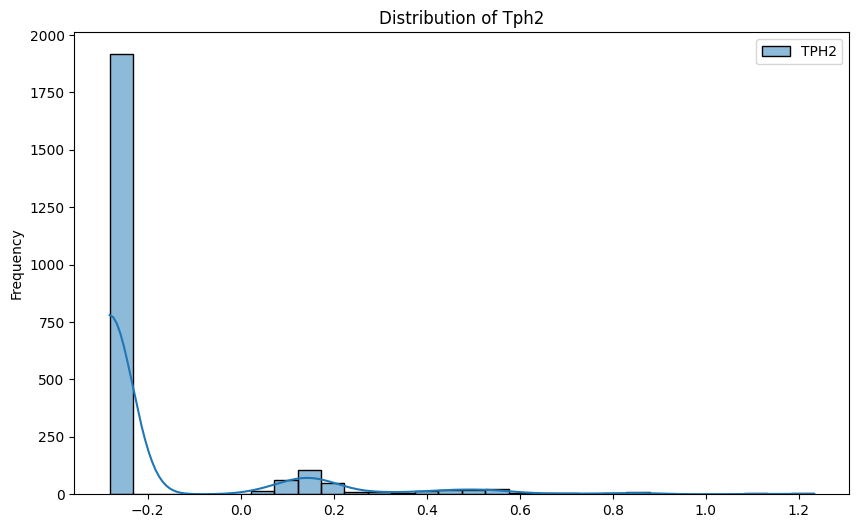

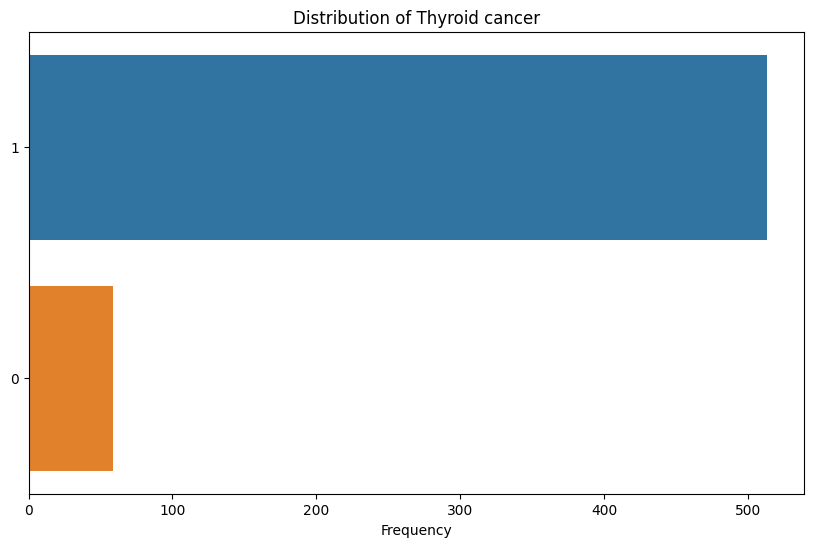

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'thca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,depression,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thyroid Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,0,-0.767592,-1.742926,-0.531035,-0.067972,0.265922,-0.13531,0.440006,-0.024246,-0.423399,...,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612,1
TCGA-BJ-A0YZ-01,0,1.766308,0.273374,-0.531035,0.790028,1.209322,0.01229,0.704606,2.321754,-0.423399,...,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312,1
TCGA-BJ-A0Z0-01,0,0.986808,-2.165726,-0.050935,0.051428,0.979522,0.48229,0.090106,0.191954,-0.423399,...,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812,1
TCGA-BJ-A0Z2-01,0,0.767208,-1.623626,-0.531035,0.182228,0.541622,0.65889,0.647206,-2.507546,0.137401,...,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588,1
TCGA-BJ-A0Z3-01,0,-0.287292,-1.766626,-0.531035,0.059628,0.920522,0.21849,0.336106,1.909954,-0.423399,...,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012,1


Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 83.11% ± 1.81%


In [14]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: depression
Coefficient: 0.0000
p-value: 1



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Thyroid Cancer conditional on the factor depression, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
   RBMY1A3P    -0.448427      2.479971e-229
      OR5L2     0.448427      2.479971e-229
      BPIL3    -0.448427      2.479971e-229
      OR5T3    -0.448427      2.479971e-229
      OR6C4    -0.448427      2.479971e-229
    DEFB123     0.448427      2.479971e-229
      OR1S1     0.448427      2.479971e-229
     OR52E2     0.448427      2.479971e-229
      TSSK2    -0.448427      2.479971e-229
     TXNDC8    -0.448427      2.479971e-229
   SNORA11C    -0.448427      2.479971e-229
     SNORD9    -0.448427      2.479971e-229
  KRTAP22-1    -0.448427      2.479971e-229
    SNAR-G1     0.448427      2.479971e-229
    SNAR-G2     0.448427      2.479971e-229
    DEFB113    -0.448427      2.479971e-229
    DEFB114     0.448427      2.479971e-229
    DEFB116    -0.448427      2.479971e-229
     OR4C13    -0.448427 